## **US COVID-19 Data (recorded on May 29, 2021)**

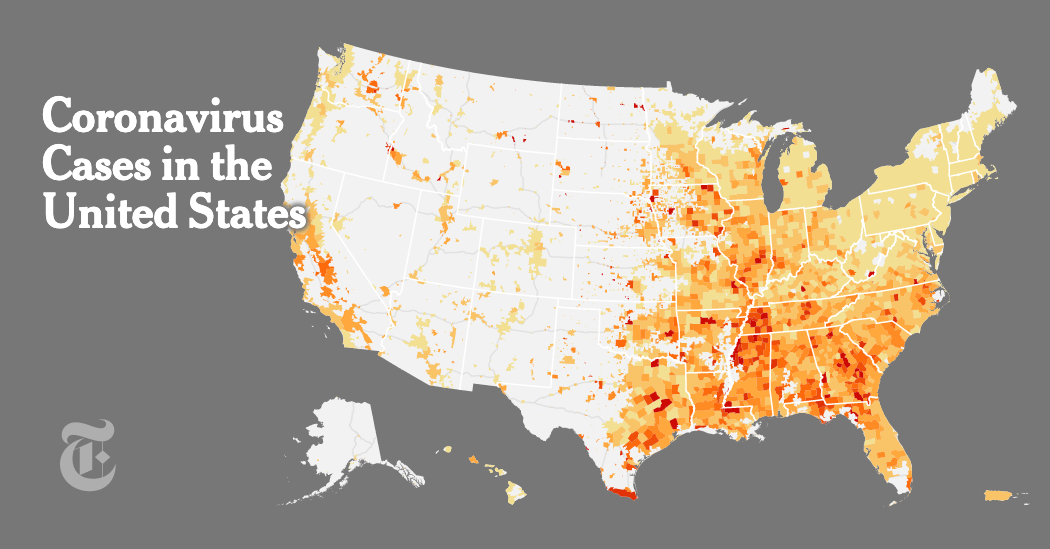

### Import the data file
- Use curl to import the data set from the following link:
  
  https://raw.githubusercontent.com/mtwood2/python1/main/us_covid_data.txt

- store the file as `covid.txt`

In [1]:
# Import the data set
!curl https://raw.githubusercontent.com/mtwood2/python1/main/us_covid_data.txt -o 'covid.txt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1213  100  1213    0     0   6220      0 --:--:-- --:--:-- --:--:--  6220


### Created a Function to Process the Data
- A function called `process_data()` that takes no parameters
- Inside the function:
  - create a list to store the data as a list and initialize it
  - open the file in read only mode
  - The first line contains headings. Read it, but do not enter it into the list
  - read the data line by line while removing leading whitespace and new line characters using a loop and the `.readline()` function
- close the file
- return the list of data
- Test the function by calling the function in my main code and printing the results

In [2]:
#Create the process_data() function
def process_data():
  covid_list = []
  covid_file = open('covid.txt', 'r')
  covid_file.readline()
  covid_line = covid_file.readline().strip('\n ')
  while covid_line:
    covid_list.append(covid_line)
    covid_line = covid_file.readline().strip('\n ')
  covid_file.close()
  return covid_list

results1 = process_data()
print(results1)

['Alabama,541928,11112', 'Alaska,69329,352', 'Arizona,876411,17547', 'Arkansas,340040,5816', 'California,3776409,62902', 'Colorado,539898,6646', 'Connecticut,346325,8212', 'Delaware,108280,1659', 'District of Columbia,48727,1125', 'Florida,2308258,36462', 'Georgia,1095026,20010', 'Hawaii,34610,491', 'Idaho,191139,2082', 'Illinois,1378492,24976', 'Indiana,742961,13553', 'Iowa,370517,6035', 'Kansas,315046,5092', 'Kentucky,457756,6866', 'Louisiana,467815,10522', 'Maine,66863,819', 'Maryland,458239,8990', 'Massachusetts,704796,17818', 'Michigan,985433,20125', 'Minnesota,598420,7456', 'Mississippi,316272,7279', 'Missouri,611807,9572', 'Montana,111267,1603', 'Nebraska,222884,2377', 'Nevada,322352,5552', 'New Hampshire,98244,1344', 'New Jersey,1013787,26072', 'New Mexico,201868,4133', 'New York,2092455,52572', 'North Carolina,996511,12984', 'North Dakota,109607,1537', 'Ohio,1096617,19709', 'Oklahoma,451830,6918', 'Oregon,198356,2642', 'Pennsylvania,1198106,27079', 'Rhode Island,151258,2704', 

### Create functions to extract data points for single states from the data set
- create a function called `state_from_record()` that takes 1 argument, a single record from the data set in the form:

  `<state name>, <covid cases>, <covid deaths>` (a single line from the file)
  - separate the record into a list on the separator `","`
  - return the name of the state

- create a function called `cases_from_record()` that takes 1 argument, a single record from the data set in the form:

  `<state name>, <covid cases>, <covid deaths>` (a single line from the file)
- separate the record into a list on the separator `","`
- return the number of cases

- create a function called `deaths_from_record()` that takes 1 argument, a single record from the data set in the form:

  `<state name>, <covid cases>, <covid deaths>` (a single line from the file)
- separate the record into a list on the separator `","`
- return number of deaths

### Test your functions
- call each of the three functions on the first item of your result from the `process_data()` function created above to make sure they work
- print the results from each function call

In [3]:
# Create the functions described above
def state_from_record(single_record):
  result = single_record.split(",")
  return result[0]
def cases_from_record(single_record):
  result = single_record.split(",")
  return int (result[1])
def deaths_from_record(single_record):
  result = single_record.split(",")
  return int (result[2])

results2 = state_from_record(results1[0])
print(results2)

results3 = cases_from_record(results1[0])
print(results3)

results4 = deaths_from_record(results1[0])
print(results4)

Alabama
541928
11112


### Create a function to print out the menu for the program
- The menu looks like this:
  ```
  1 - Lookup by State
  2 - Find State with Most Cases/Deaths
  3 - Find Total US Cases/Deaths
  4 - Top 10 States for Cases/Deaths
  5 - Quit
   
  ```

In [4]:
# Create the print_menu() function
def print_menu():
  numLst = []
  for num in range(1,6):
    numLst.append(num)
  print('{:1d} - {:<34s}'.format(numLst[0], "Lookup by State"))
  print('{:1d} - {:<34s}'.format(numLst[1], "Find State with Most Cases/Deaths"))
  print('{:1d} - {:<34s}'.format(numLst[2], "Find Total US Cases/Deaths"))
  print('{:1d} - {:<34s}'.format(numLst[3], "Top 10 States for Cases/Deaths"))
  print('{:1d} - {:<34s}'.format(numLst[4], "Quit"))
  print()
print_menu()

1 - Lookup by State                   
2 - Find State with Most Cases/Deaths 
3 - Find Total US Cases/Deaths        
4 - Top 10 States for Cases/Deaths    
5 - Quit                              



### Create a function to generate a state report from the data
- Import the `random` module
- Create a function called `state_report()` that takes two parameters, `state` (the name of the state to make a report for) and `data_list` the data set as a list).
- check if the state name is `Random`. If it is, set `state` to a state name from a random data value in the list.
- Use a loop to go through each record
  - check if the state name in the current record is equal to `state`. If it is, build a string in the following format:
    ```
    <Name of the State>
    Total Confirmed Cases: <Number of confirmed cases in the state>
    Total Deaths: <Number of Deaths in the state>
    ```
  - return the string containing the report
- If you go through the loop and never find the state, return a string in the following format:
  ```
  No record found for <Name of the state>
  ```
  
**Note**: Make sure to use the functions you created above to get state, cases, and death values from a data record

- Test your function by calling it using a state as an argument, a string that is not a state, and `Random`. For each one, store and print the results.  

In [6]:
# Generate a report for a state as text
import random
def state_report(state, data_list):
  if state == "Random":
    state = state_from_record(random.choice(data_list))
  result = ""
  for state_info in data_list:
    temp_state = state_from_record(state_info)
    if temp_state == state:
      result += state + "\n"
      result += "Total Confirmed Cases: " + str(cases_from_record(state_info)) + "\n"
      result += "Total Deaths: " + str(deaths_from_record(state_info)) + "\n"
      return result
  result = "No record found for " + state + "\n"
  return result

results5 = state_report("New York", process_data())
print(results5)

results6 = state_report("North Carolina", process_data())
print(results6)

results7 = state_report("Random", process_data())
print(results7)

New York
Total Confirmed Cases: 2092455
Total Deaths: 52572

North Carolina
Total Confirmed Cases: 996511
Total Deaths: 12984

Oklahoma
Total Confirmed Cases: 451830
Total Deaths: 6918



### Create a function to find the state with the most covid cases and most covid deaths
- Create a function called `find_most()` that takes two parameters, `value` (will be `c` if finding the most cases or `d` if finding the most deaths) and `data_list` the data set as a list.
- Create a variable called `max_index` and initialize it to `0`
- Create a variable called `max_state` and set it to the state name found in the first data record in the list
- Create a variable called `max_value` and initialize it to `0`
- Check if the parameter `value` is equal to `c`. if it is, set `max_value` to the number of cases found in the first data record in the list as an integer. If `value` is not `c` then set `max_value` to the number of deaths found in the first data record in the list as an integer.
- Create a loop that will go through the list of data records using range iteration.
  - Check if `value` is `c`. If it is, check if the number of cases from the current record is greater than the value contained in `max_value`. If it is, set `max_index` to the current index, `max_state` to the current state name, and `max_value` to the current number of cases. If it is not, do nothing. Otherwise, check if the number of deaths from the current record is greater than the value contained in `max_value`. If it is, set `max_index` to the current index, `max_state` to the current state name, and `max_value` to the current number of deaths. If it is not, do nothing.
- Outside of the loop, return a new list where the first item is `max_index`, the second item is `max_state` and the third item is `max_value`
- Test your function by calling it with an argument for value of `c` and `d` and printing the results. If done correctly, you should get `California` when using `c` for value and `New York` when using `d` for value.

In [7]:
# Create find_most() function
def find_most(value, data_list):
  max_index = 0
  max_state = state_from_record(data_list[0])
  max_value = 0

  if value == "c":
    max_value = cases_from_record(data_list[0])
  else:
    max_value = deaths_from_record(data_list[0])

  for index in range(len(data_list)):
    if value == "c":
      if cases_from_record(data_list[index]) > max_value:
        max_index = index
        max_state = state_from_record(data_list[index])
        max_value = cases_from_record(data_list[index])
    else:
      if deaths_from_record(data_list[index]) > max_value:
        max_index = index
        max_state = state_from_record(data_list[index])
        max_value = deaths_from_record(data_list[index])

  return [max_index, max_state, max_value]

results8 = find_most("c", process_data())
print(results8)

# I got California for both because at the time of me coding this project,
# California had 62,902 deaths while New York had 52,572 deaths (according to the file)
# Therefore California takes the prize for having the most deaths and cases now
results9 = find_most("d", process_data())
print(results9)

[4, 'California', 3776409]
[4, 'California', 62902]


### Create a function to find the total number of cases or deaths in the US
- Create a function called `find_total()` that takes two parameters, `value` (will be `c` if finding the most cases or `d` if finding the most deaths) and `data_list` the data set as a list.
- Create a variable called `total` and initialize it to `0`
- Create a loop that will go through the list of data records using range iteration.
  - Check if the parameter `value` is equal to `c`. If it is, add the number of cases from the current record to the total. Otherwise, add the number of deaths from the current record to the total.
- Outside of the loop, return the total.
- Test your function by calling it with an argument for value of `c` and `d` and printing the results.

In [8]:
# Create the find_total() function
def find_total(value, data_list):
  total = 0
  for index in range(len(data_list)):
    if value == 'c':
      total += cases_from_record(data_list[index])
    else:
      total += deaths_from_record(data_list[index])
  return total

results10 = find_total("c", process_data())
print(results10)

32939979


### Create a function to make a Top Ten Report
- Import `date` from the `datetime` module
- Create a function called `top_ten()` that takes two parameters, `value` (will be `c` if finding the most cases or `d` if finding the most deaths) and `data_list` the data set as a list.
- Create a variable called `covid_copy` and set it to a copy of the `data_list`. You can do this by using the writing the following programming statement:
  
  `covid_copy = data_list.copy()`

- Create a variable called `report_type` and initialize it to the empty string
- Check if the parameter `value` is `c`. If it is, set `report_type` to `Cases`. Otherwise, set `report_type` to `Deaths`
- Print a line in the following format:
  
  `Report Created on <Current Date in the format: Jan 4, 2021>`

- Print a header for the report by using output formatting. The first value should be `Rank`, then `State`, then the value of the variable `report_type`. Use 6 for the width of rank, 20 for the width of state, and 10 for the width of `report_type`. Make each value left adjusted.
- print a line of 36 `-` characters
- Create a loop using range iteration that will execute in the range 1 to 10 inclusive.
  - Check if the parameter `value` is `c`. Use your `find_most()` function to find the record with the largest number of cases in the `covid_copy` list. Otherwise, use your `find_most()` function to find the record with the largest number of deaths in the `covid_copy` list
  - Use output formatting to print a line of information. The first value should be the current value the loop is on in the range, the second is the state value found from the `find_most()` function (the second item in the list returned from the function), and the third should be the number of cases found from the `find_most()` function. Use the same widths you did for the heading created above (6, 20, 10) and make each value left adjusted.
  - delete the item from the `covid_copy` list at the index contained in the first item of the value returned from the `find_most()` function
- Test your function by calling it and printing the results.

In [9]:
# Create the top_ten() function
from datetime import date
def top_ten(value, data_list):
  covid_copy = data_list.copy()
  report_type = ""
  if value == "c":
    report_type = "Cases"
  else:
    report_type = "Deaths"
  print("Report Created on", date.today().strftime("%b %d, %Y"))
  print("{:<6s} {:<20s} {:<10s}".format("Rank", "State", report_type))
  print("-"*36)
  for ranking in range(1, 11):
    if value == 'c':
      record = find_most("c", covid_copy)
    else:
      record = find_most("d", covid_copy)
    print("{:<6d} {:<20s} {:<10d}".format(ranking, record[1], record[2]))
    covid_copy.pop(record[0])
  print()

results11 = top_ten("c", process_data())

Report Created on Jul 12, 2023
Rank   State                Cases     
------------------------------------
1      California           3776409   
2      Texas                2941273   
3      Florida              2308258   
4      New York             2092455   
5      Illinois             1378492   
6      Pennsylvania         1198106   
7      Ohio                 1096617   
8      Georgia              1095026   
9      New Jersey           1013787   
10     North Carolina       996511    



### Main Program
- Create a variable called `covid_list` and set it to the results of your `process_data()` function
- Create an infinite loop
  - print the menu of options by calling your `print_menu()` function
  - Create a variable called `user_choice` and set it by getting input from the user by prompting them to enter the option they would like.
  - Check if `user_choice` is 1. If it is:
    - Create a variable called `user_state` and set it by getting input from the user by prompting them to enter the name of the state they want to create a report for, or random if they want a report for a random state.
    - Change `user_state` to title case
    - call your `state_report()` function with the `user_state` and `covid_list` as arguments. store and print the results.

  - Otherwise, check if `user_choice` is 2. If it is:
    - get user input for a variable called `user_choice` by prompting the user to enter `c` for most cases or `d` for most deaths.
    - change the value of `user_choice` to lower case.
    - call your `find_most()` function with the `user_choice` and `covid_list` as arguments. store and print the results.
  - Otherwise check if `user_choice` is 3. If it is:
    - get user input for a variable called `user_choice` by prompting the user to enter `c` for most cases or `d` for most deaths.
    - change the value of `user_choice` to lower case.
    - call your `find_total()` function with the `user_choice` and `covid_list` as arguments. store and print the results.
  - Otherwise check if `user_choice` is 4. If it is:
    - call your `top_ten()` function.
  - Otherwise, check if `user_choice` is 5. If it is:
    - print `Goodbye!` and break the loop
  - Otherwise, print a statement letting the user know they made an invalid choice and to try again.

In [10]:
# Main Program Code
covid_list = process_data()
while True:
  print_menu()
  user_choice = input("Enter the option you would like: ")
  if user_choice.isdigit():
    if int (user_choice) == 1:
      user_state = input("Enter a state or \"Random\" if you want a random state: ")
      user_state = user_state.title()
      results12 = state_report(user_state, covid_list)
      print(results12)
    elif int (user_choice) == 2:
      user_choice = input("Enter 'c' for the most cases or 'd' for the most deaths: ")
      user_choice = user_choice.lower()
      results13 = find_most(user_choice, covid_list)
      print(results13)
    elif int (user_choice) == 3:
      user_choice = input("Enter 'c' for the total cases or 'd' for the total deaths: ")
      user_choice = user_choice.lower()
      results14 = find_total(user_choice, covid_list)
      print(results14)
    elif int (user_choice) == 4:
      user_choice = input("Enter 'c' for the most cases or 'd' for the most deaths: ")
      user_choice = user_choice.lower()
      results15 = top_ten(user_choice, covid_list)
    elif int (user_choice) == 5:
      print("Goodbye!")
      break
    else:
      print("You have entered an invalid option, try again")
  else:
    print("You have entered an invalid option, please try again")

1 - Lookup by State                   
2 - Find State with Most Cases/Deaths 
3 - Find Total US Cases/Deaths        
4 - Top 10 States for Cases/Deaths    
5 - Quit                              

Enter the option you would like: 1
Enter a state or "Random" if you want a random state: North Carolina
North Carolina
Total Confirmed Cases: 996511
Total Deaths: 12984

1 - Lookup by State                   
2 - Find State with Most Cases/Deaths 
3 - Find Total US Cases/Deaths        
4 - Top 10 States for Cases/Deaths    
5 - Quit                              

Enter the option you would like: 1
Enter a state or "Random" if you want a random state: Random
Nebraska
Total Confirmed Cases: 222884
Total Deaths: 2377

1 - Lookup by State                   
2 - Find State with Most Cases/Deaths 
3 - Find Total US Cases/Deaths        
4 - Top 10 States for Cases/Deaths    
5 - Quit                              

Enter the option you would like: 2
Enter 'c' for the most cases or 'd' for the most dea